## Introduction
The goal of this project is to use the Long Short Term Memory Network (LSTM), a machine learning model (deep learning) to predict stock prices using a specific company, AMC Theatres. The project is done soley as a course requirement to enhance programming and predictive machine learning skills for real world problems. Using machine learning for predictions in the stock market can be very complicated. It should be emphasized that the model in this project should not be used as a financial advice to make investments in the stock market. The the model used in this project can provide some basic knowledge on short term price momentum. The model in this project can be improved through careful feature engineering.  

## Problem Definition and Algorithm
Predicting the stock price for the next trading day is the main problem addressed in this project. The machine learning algorithm used is the Long Short Term Memory (LSTM) model, a deep learning recurrent neural network(RNN). 

### i. Application
The LSTM model used in this project is applied on AMC Theatres actual trading data accessable in scikit-learn library through the yahoo finance API. The LSTM model uses data from January 1, 2020 to March 2, 2021 and look back 15 days into the dataset to make prediction for the next trading day. As already mentioned, the model in this project can be built upon to make similar prediction on different companies in the stock market. 

### ii. Motivation
The motivation behind this project is identifying and how to apply machine learning algorithm in the stock market.The application of machine learning in the stock market can be very complicated, therefore it makes sense to apply ML concepts on specific tasks. On the other hand, decisions to enter the stock market are usually based on statistically driven-assumptions regarding price actions. The relevance in making a decision to enter or exit the stock market can hugely rely on a statistical or machine learning model that can make better predictions in regard to increasing profits and cutting losses.Building a model that is tested to make close predictions could add value when making decisions to trade. 

## Methodology 
Sckikit-learn, Tensorflow and Keras are the key libraries used for the machine learning task covered in this project. The sequential model is used to build the LSTM architecture. There are three layers used in building the model; the actual LSTM, Dense and Dropout layers. This picture shows a summary of the modelScreen [image-2.png](attachment:image-2.png). Pandas DataReader library is used to access yahoo finance api to download AMC Theatres historical data from January 1, 2020 to March 18, 2021. The goal here is to used this historical data and look 15 days back to predict AMC's stock price the next trading day. Using the MinMaxScaler library, the data was scaled between 0, 1 to prepare it for the recurrent neural network algorithm. The model optimizer was set to adam and the mean squared error was used as the loss function in the model. The model was trained to reviewed each instance 25 times (epochs = 25) with a batch size of 32. 

In [12]:
# Importing key libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
%matplotlib inline

In [13]:
# Importing the the sequential model, Dense, Dropout and LSTM layers including the scaling library 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [5]:
# Loading the data
company = "AMC"
start = dt.datetime(2019,1,1)
end = dt.datetime(2020,1,1)

In [29]:
data= web.DataReader(company, 'yahoo', start, end)

## Updates
At certain point, the yahoo API became inaccessible. If the above codes are unable to collect data from the Yahoo API, the below lines of code should perform the task.

In [30]:
# pip3 install yfinance --upgrade --no-cache-dir # for Python 3 and upward


# from pandas_datareader import data as pdr
# import yfinance as yf

# yf.pdr_override()

# mydata = pdr.get_data_yahoo("AMC", start="2019-01-01", end="2020-01-01")
# print(mydata)

In [152]:
# Preparing the data for the Recurrent Neural Network
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [153]:
# Setting the number of days to look back at for prediction
prediction_days = 14
x_train =[]
y_train = []

for x in range(prediction_days,len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])

In [154]:
# Converting the data into numpy arrays
x_train, y_train=np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [155]:
# Building the Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))# Prediction of the next closing price

In [156]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [181]:
# Fiting the model
model.fit(x_train, y_train, epochs=25, batch_size=32)

In [169]:
# Here the model is tested on this dataset to check for accuracy when applied on the current dataset that the model hasn't seen
test_start = dt.datetime(2020, 1,1)
test_end = dt.datetime.now()

In [170]:
# Building the test dataset for the model as mentioned in the cell above
test_data = web.DataReader(company, 'yahoo', test_start, test_end)
actual_prices = test_data['Close'].values

In [171]:
# Combining the test dataset 
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

In [172]:
# What the model should see to make the predictions
model_inputs = total_dataset[len(total_dataset)- len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)

In [173]:
# Transforming the model inputs
model_inputs = scaler.transform(model_inputs)

In [174]:
# Making the predictions on the test data
x_test = []
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

In [175]:
# Converting the test sets into numpy arrays
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [176]:
# Creating a prediction on the test set
predicted_prices = model.predict(x_test)

In [177]:
# Inversely scaling the predicted prices
predicted_prices = scaler.inverse_transform(predicted_prices)

In [183]:
# Plotting the test prediction
plt.plot(actual_prices, color="black", label=f"Actual{company} Price")
plt.plot(predicted_prices, color="green", label=f"Predicted{company} Price")
plt.title(f"{company} Share Price")
plt.xlabel("Time")
plt.ylabel(f"{company} Share Price")
plt.show()

In [179]:
# Predicting the actual next day
real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1))

In [184]:
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")

In [146]:
# model.summary()

## Results
The LSTM architecture used in this model predicted AMC's closing price to be $11.9. As of the date of writing this paper, AMC's closing price was $ 13.59 based on Robinhood's trading platform closing price on March 19, 2021. 
Before preparing the model for predictions on the real time data, the LSTM model was used on a training set to test for model's accuracy. This graph, shows how well the model performed in predicting the testing data (not the actual model's test set for real prediction), 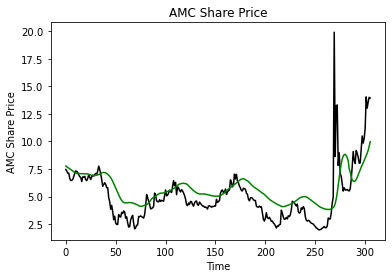. Observed the predicted trend line (green), how it closely follows the actual prices trendline(black). 
Therefore, it sends a good signal for the model to actually predict a lower price instead when compared to the true price of AMC's stock closing price. If the model had overly predicted the actual closing price, what that means is there would have been a strong likelihood of overfitting.

## Discussion
After watching a couple of YouTube videos from machine learning experts,the LSTM model in this project performs at a better level considering that the predicted AMC's closing stock price for the day is that far from the actual closing price ($ 13.5). Predicting actual stock prices is very complicated would require a series of data processing beyond the scope and time of this project. The methodology and data preprocessing covered in this project provides a good learning experience and a fair amount of understanding in using machine learning in the stock market. Below is a flow chart of the project providing a graphic summary of the main components.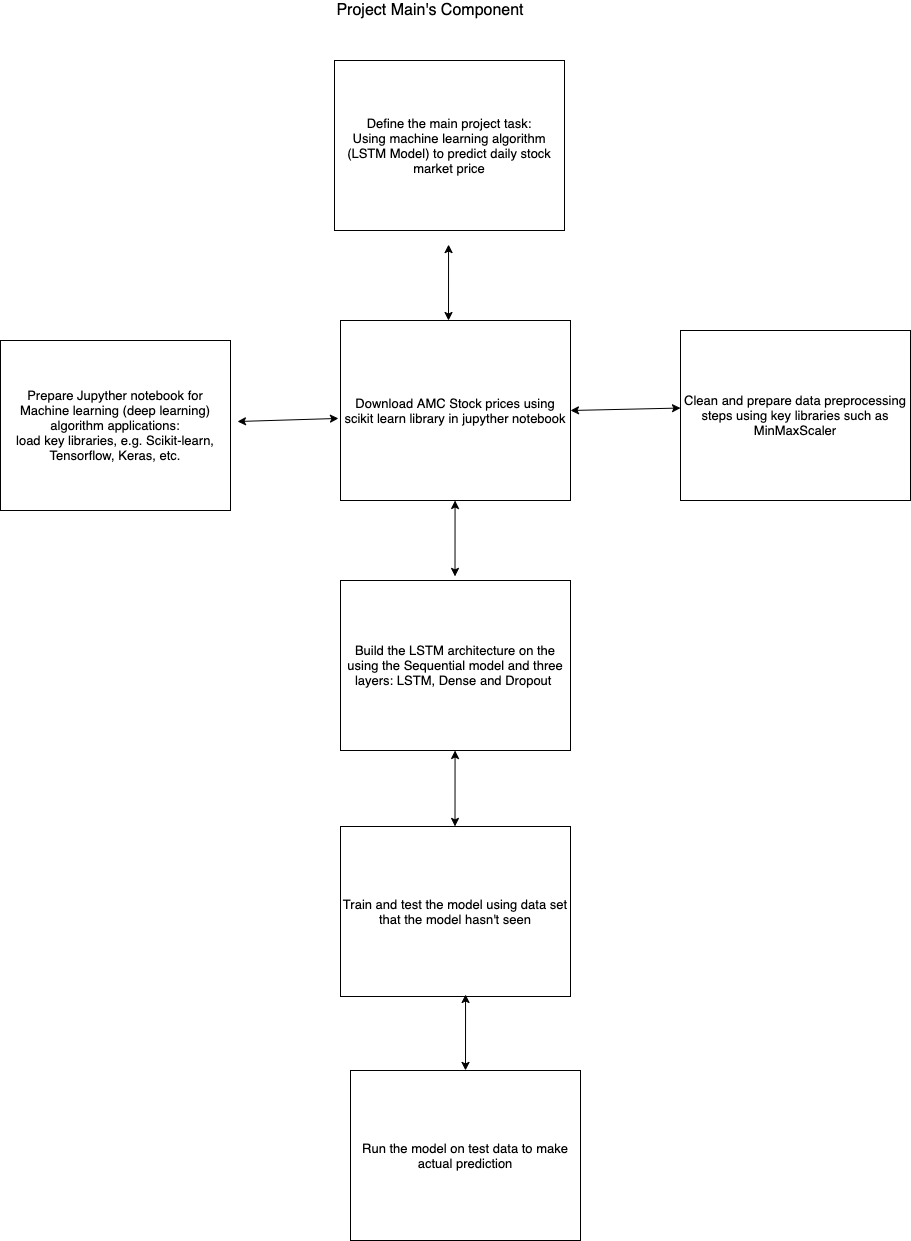.

## Conclusion and Recommendation
The model in this project is not exhaustive to be used for financial advice in making investment decisions. Using machine learing in stock market prediction can be complicated and this project scope does not cover other techniques. However, there are key lessons learned from applying the LSTM model used in this project, machine learning (deep learning) has great computing capability that can unlock many opportunities in tackling real business problems. A key recommendation from the experiencing in this project is that the model should be built upon at an advanced level for further data exploration and to make predictions.